# Ejercicio Práctico de Koalas

In [25]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import pyspark
from pyspark.sql import SparkSession

In [19]:
import numpy as np
import pandas as pd
#import databricks.pandas as ps
import pyspark.pandas as ps

import matplotlib.pyplot as plt


### Funciones básicas

In [3]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ps.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [4]:
## Ordena kser por el index

kser_sorted = kser.sort_index()

# Mostrar la serie ordenada
print(kser_sorted)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [7]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf

kdf = ps.DataFrame(pdf)

# Mostrar el DataFrame de Koalas
print(kdf)

          A         B
0  0.461534  0.995540
1  0.266894  0.973451
2  0.812469  0.107400
3  0.166146  0.110512
4  0.915672  0.741899


### Visualización de datos

In [8]:
## Describe los datos de kdf

kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.524543,0.585760
std,0.329654,0.446456
min,0.166146,0.107400
25%,0.266894,0.110512
50%,0.461534,0.741899
75%,0.812469,0.973451
max,0.915672,0.995540


In [9]:
## Ordena los datos de kdf por la columna B

kdf_sorted = kdf.sort_values(by='B')

# Mostrar el DataFrame ordenado
print(kdf_sorted)

          A         B
2  0.812469  0.107400
3  0.166146  0.110512
4  0.915672  0.741899
1  0.266894  0.973451
0  0.461534  0.995540


In [10]:
## Transpon los datos de kdf

kdf_transposed = kdf.transpose()

# Mostrar el DataFrame transpuesto
print(kdf_transposed)

          0         1         2         3         4
A  0.461534  0.266894  0.812469  0.166146  0.915672
B  0.995540  0.973451  0.107400  0.110512  0.741899


### Selección

In [11]:
## Selecciona las varaibles A y B de Kdf

kdf_selected = kdf[['A', 'B']]

# Mostrar el DataFrame seleccionado
print(kdf_selected)

          A         B
0  0.461534  0.995540
1  0.266894  0.973451
2  0.812469  0.107400
3  0.166146  0.110512
4  0.915672  0.741899


In [12]:
## Selecciona las filas 1, 2 de kdf

kdf_selected_rows = kdf.iloc[1:3]

# Mostrar el DataFrame con las filas seleccionadas
print(kdf_selected_rows)

          A         B
1  0.266894  0.973451
2  0.812469  0.107400


In [13]:
## Selecciona las filas 0, 1 y 2 de la variable B

kdf_selected = kdf['B'].iloc[0:3]

# Mostrar el resultado
print(kdf_selected)

0    0.995540
1    0.973451
2    0.107400
Name: B, dtype: float64


### Aplicando funciones de Python a Koalas

In [14]:
## Aplica la funcion de Python de np.cumsum a kdf

kdf_cumsum = kdf.apply(np.cumsum)

# Mostrar el DataFrame con la suma acumulativa
print(kdf_cumsum)

C:\Spark\spark-3.5.3-bin-hadoop3\python\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `apply`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


          A         B
0  0.461534  0.995540
1  0.728428  1.968991
2  1.540897  2.076391
3  1.707043  2.186903
4  2.622715  2.928802


In [15]:
## Eleva al cuadrado los valores de kdf

kdf_squared = kdf ** 2

# Mostrar el DataFrame con los valores al cuadrado
print(kdf_squared)

          A         B
0  0.213014  0.991099
1  0.071232  0.947607
2  0.660106  0.011535
3  0.027604  0.012213
4  0.838456  0.550415


### Agrupando datos

In [16]:
## Obten la suma de los valores al agrupar por A y por B

kdf_grouped_sum = kdf.groupby(['A', 'B']).sum()

# Mostrar el DataFrame con la suma agrupada
print(kdf_grouped_sum)

C:\Spark\spark-3.5.3-bin-hadoop3\python\pyspark\pandas\groupby.py:893: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


Empty DataFrame
Columns: []
Index: [(0.46153425064141473, 0.9955395428978093), (0.2668935574858301, 0.9734513151072526), (0.812469200965246, 0.1074001115802522), (0.1661455086913688, 0.1105115338912599), (0.9156724103333934, 0.7418994355648499)]


### Generando gráficos

In [15]:
# This is needed for visualizing plot on notebook
%matplotlib inline

C:\Spark\spark-3.5.3-bin-hadoop3\python\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


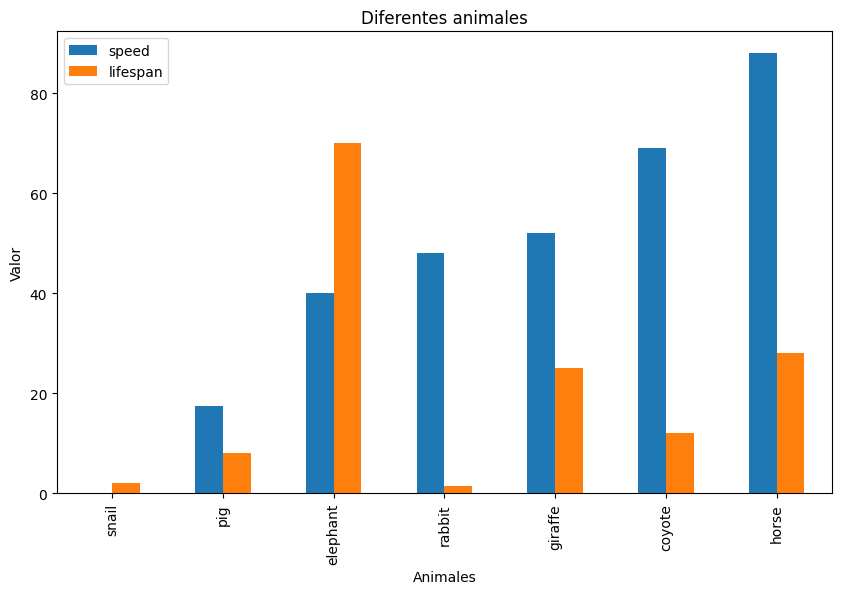

In [21]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

kdf = ps.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

## Genera un grafico de barras con kdf y matplotlib

kdf_pandas = kdf.to_pandas()

# Crear un gráfico de barras
kdf_pandas.plot(kind='bar', figsize=(10, 6))

# Etiquetas y título
plt.title('Diferentes animales')
plt.xlabel('Animales')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

C:\Spark\spark-3.5.3-bin-hadoop3\python\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


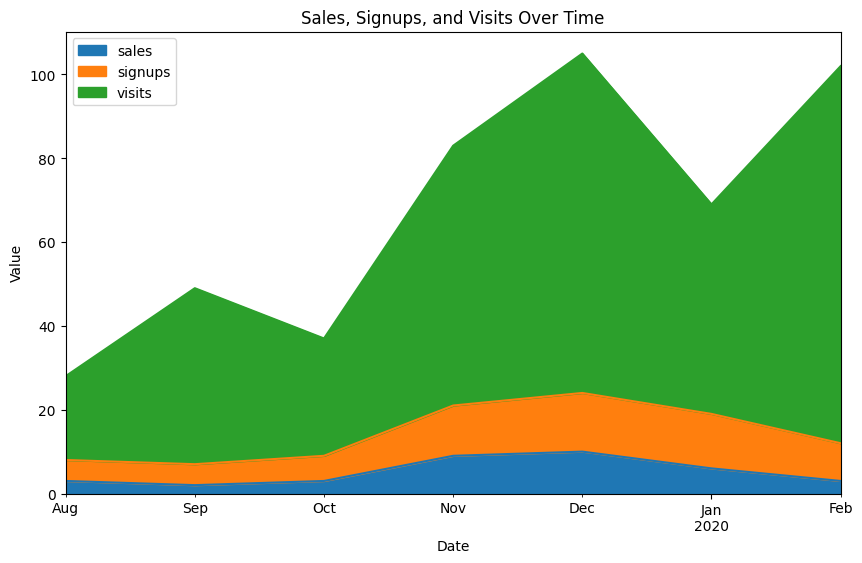

In [22]:
kdf = ps.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))

## Genera un grafico de areas con kdf y matplotlib

kdf_pandas = kdf.to_pandas()

# Crear el gráfico de áreas
kdf_pandas.plot.area(figsize=(10, 6))

# Etiquetas y título
plt.title('Sales, Signups, and Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Mostrar el gráfico
plt.show()

### Utilizando SQL en ps

In [23]:
kdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [27]:
## Con una consulta SQL selecciona los datos donde pig sea mayor que 100

spark = SparkSession.builder.master("local").appName("SQL Example").getOrCreate()


kdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

# Convertir el DataFrame de Pandas API on Spark a un DataFrame de Spark
spark_df = spark.createDataFrame(kdf.to_pandas())

# Registrar el DataFrame como una tabla temporal en Spark
spark_df.createOrReplaceTempView("animals")

# Ejecutar la consulta SQL
result = spark.sql("SELECT * FROM animals WHERE pig > 100")

# Mostrar el resultado
result.show()

C:\Spark\spark-3.5.3-bin-hadoop3\python\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+----+----+-----+
|year| pig|horse|
+----+----+-----+
|2003| 489|  281|
|2009| 675|  600|
|2014|1776| 1900|
+----+----+-----+



In [28]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [30]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken

# Crear DataFrame kdf (pandas on spark)
# Crear el DataFrame de Pandas API on Spark kdf
kdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

# Convertir pdf a un DataFrame de Pandas API on Spark
pdf_ps = ps.from_pandas(pdf)

# Hacer el inner join entre kdf y pdf_ps en la columna 'year'
joined_df = kdf.merge(pdf_ps, on='year', how='inner')

# Seleccionar las columnas 'pig' y 'chicken' y ordenar por ambas
result = joined_df[['year', 'pig', 'chicken']].sort_values(by=['pig', 'chicken'])

# Mostrar el resultado
print(result)

   year   pig  chicken
1  1997    18      326
0  1990    20      250
2  2003   489      589
3  2009   675     1241
4  2014  1776     2118


### Trabajando con PySpark

In [31]:
kdf = ps.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})



In [23]:
## muestra los datos
kdf

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
